In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
from warnings import filterwarnings
filterwarnings('ignore')

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [7]:
df.shape

(26967, 10)

In [8]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 34
(26967, 10)


In [10]:
df.drop_duplicates(inplace=True) 

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [12]:
df.shape

(26933, 10)

In [13]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [14]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [15]:
len(df.columns)

10

In [16]:
df_new=df.drop(df.columns[[1, 2, 3]], axis=1)
df_new

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


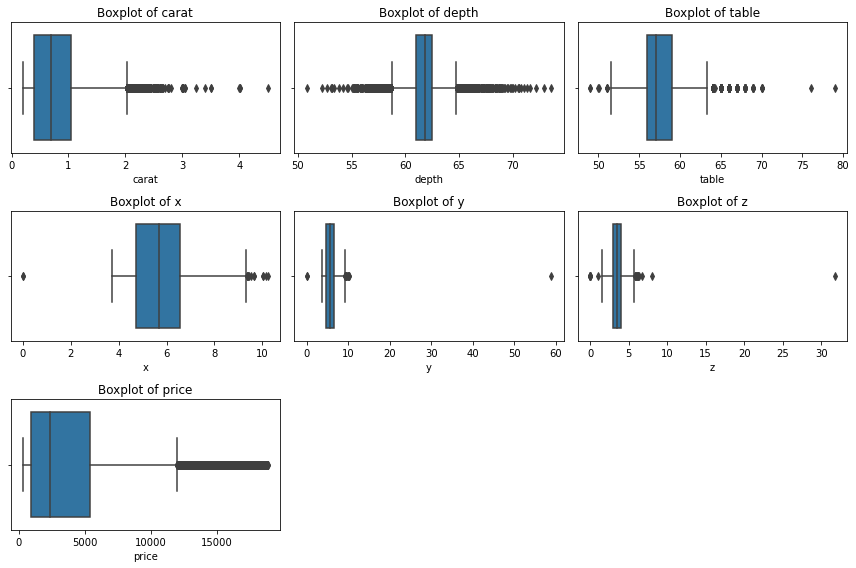

In [17]:
plt.figure(figsize = (12,8))
New_list = df_new.columns
for i in range(len(New_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = df_new[New_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(New_list[i]))
    plt.tight_layout()

In [18]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
for i in New_list:
    LL, UL = remove_outlier(df_new[i])
    df_new[i] = np.where(df_new[i] > UL, UL, df_new[i])
    df_new[i] = np.where(df_new[i] < LL, LL, df_new[i])

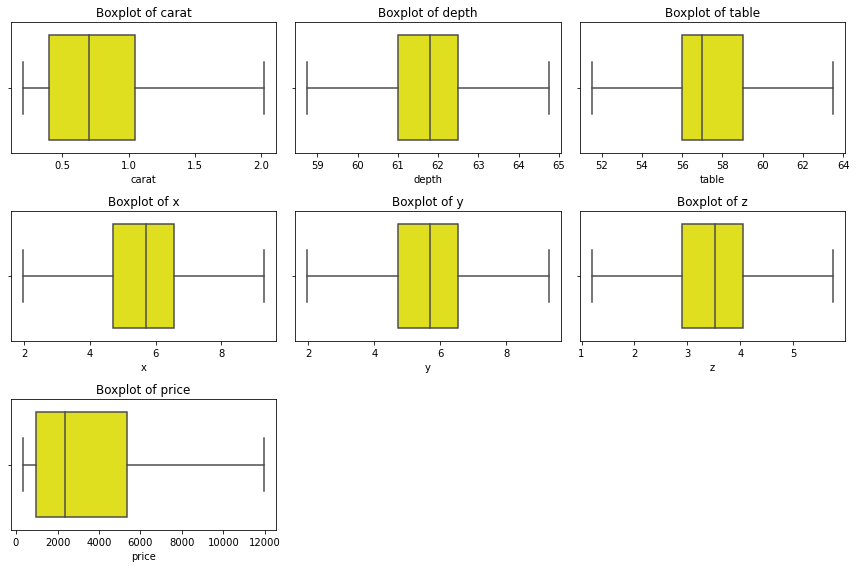

In [20]:
plt.figure(figsize = (12,8))
New_list = df_new.columns
for i in range(len(New_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = df_new[New_list[i]], data = df_new,color='yellow')
    plt.title('Boxplot of {}'.format(New_list[i]))
    plt.tight_layout()

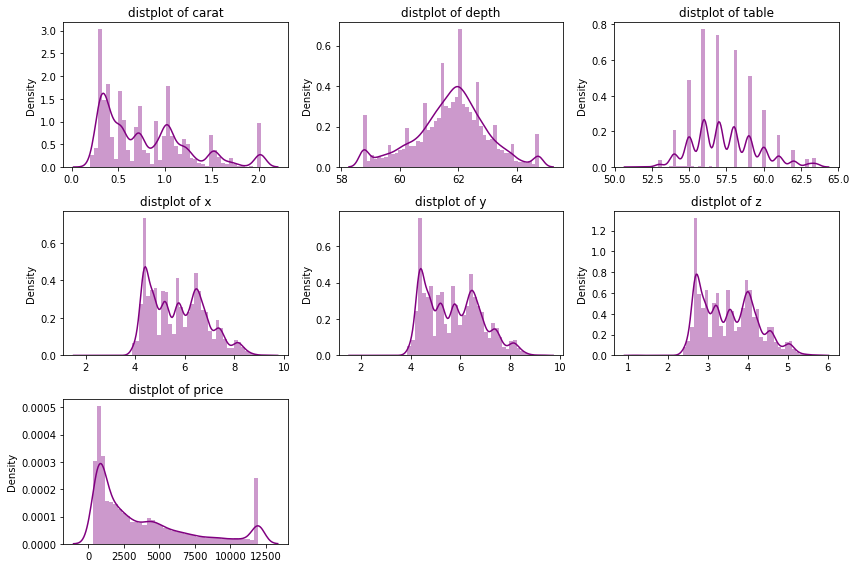

In [21]:
plt.figure(figsize = (12,8))
New_list = df_new.columns
for i in range(len(New_list)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(x = df_new[New_list[i]],color='purple')
    plt.title('distplot of {}'.format(New_list[i]))
    plt.tight_layout()

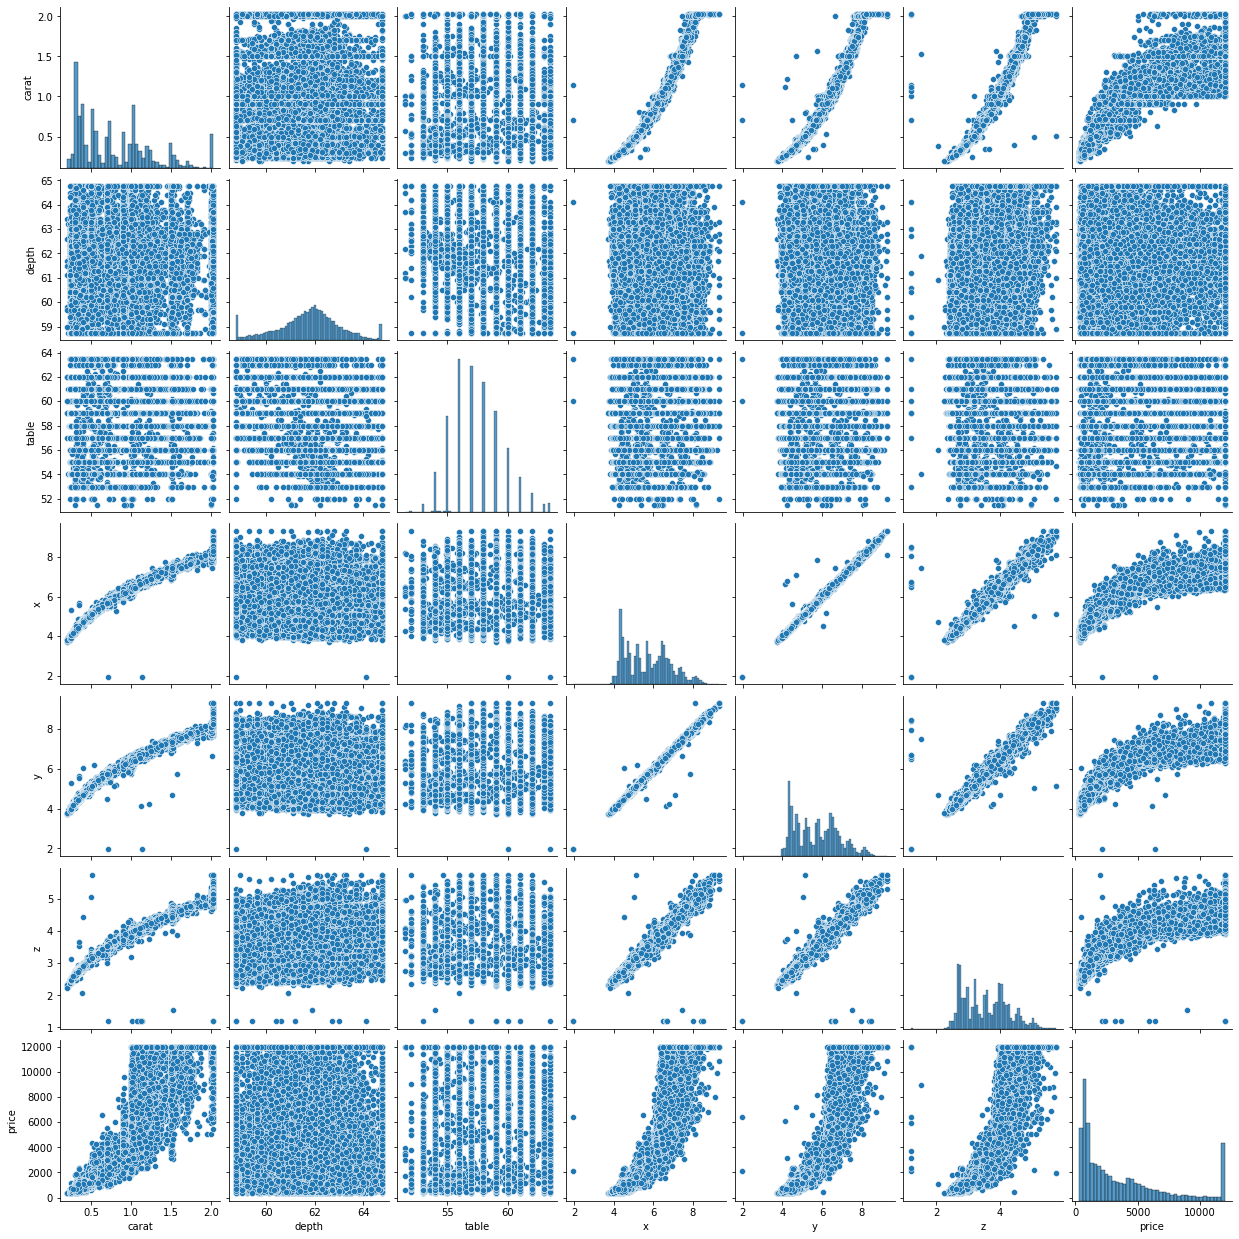

In [22]:
sns.pairplot(df_new)
plt.show()

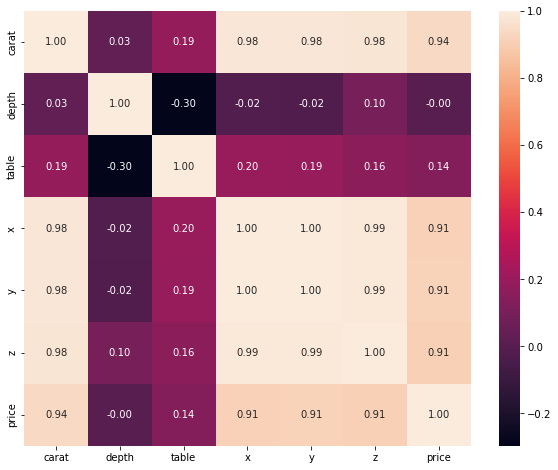

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True,fmt=".2f")
plt.show()

<AxesSubplot:xlabel='cut', ylabel='count'>

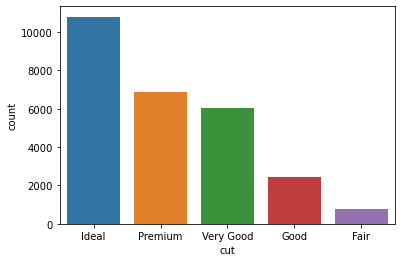

In [24]:
sns.countplot(x='cut',data=df)

<AxesSubplot:xlabel='color', ylabel='count'>

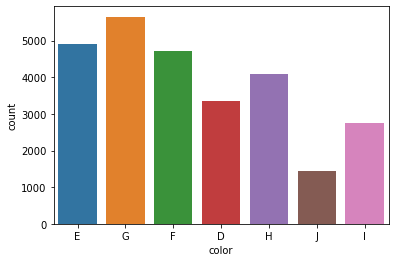

In [25]:
sns.countplot(x='color',data=df)

<AxesSubplot:xlabel='clarity', ylabel='count'>

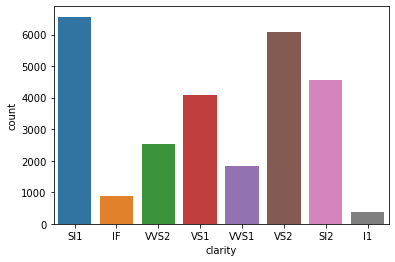

In [26]:
sns.countplot(x='clarity',data=df)

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [27]:
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [28]:
df=df.fillna(df.median())

In [29]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [30]:
print("Number of rows with x==0: {} ".format((df.x==0).sum()))
print("Number of rows with y==0: {} ".format((df.y==0).sum()))
print("Number of rows with z==0: {} ".format((df.z==0).sum()))
print("Number of rows with depth==0: {} ".format((df.depth==0).sum()))

Number of rows with x==0: 2 
Number of rows with y==0: 2 
Number of rows with z==0: 8 
Number of rows with depth==0: 0 


In [31]:
df.shape

(26933, 10)

### 1.3: Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using R square, RMSE & Adj R square. Compare these models and select the best one with appropriate reasoning.

In [32]:
df.cut.value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [33]:
df['cut']=df['cut'].replace({'Ideal':'4','Premium':'3','Very Good':'2','Good':'1','Fair':'0'})

In [34]:
df.color.value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [35]:
df['color']=df['color'].replace({'D':'6','E':'5','F':'4','G':'3','H':'2','I':'1','J':'0'})

In [36]:
df.clarity.value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [37]:
 df['clarity']=df['clarity'].replace({'IF':'7','VVS1':'6','VVS2':'5','VS1':'4','VS2':'3','SI1':'2','SI2':'1','I1':'0'})

In [38]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [39]:
df['cut']=df['cut'].astype('float64')
df['color']=df['color'].astype('float64')
df['clarity']=df['clarity'].astype('float64')
df['price']=df['price'].astype('float64')

In [40]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [41]:
X = df.drop('price', axis=1)
y = df[['price']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [44]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11021.5762856431
The coefficient for cut is 108.11271172421316
The coefficient for color is 333.8688278310745
The coefficient for clarity is 505.36402041070073
The coefficient for depth is -79.53203088135557
The coefficient for table is -30.355626896671776
The coefficient for x is -939.4874841192125
The coefficient for y is 10.632197996774007
The coefficient for z is -41.273044164816206


In [45]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is [4276.21339173]


In [46]:
regression_model.score(X_train, y_train)

0.9085603520172196

In [47]:
regression_model.score(X_test, y_test)

0.9078443635348574

In [48]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1212.4194453290168

In [49]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1230.2783981289456

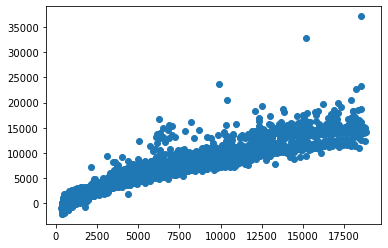

In [50]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [51]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2.0,2.0,3.0,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4.0,5.0,3.0,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4.0,3.0,2.0,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3.0,4.0,1.0,61.1,62.0,6.54,6.49,3.98,4057.0


In [52]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept     4276.213392
carat        11021.576286
cut            108.112712
color          333.868828
clarity        505.364020
depth          -79.532031
table          -30.355627
x             -939.487484
y               10.632198
z              -41.273044
dtype: float64

In [53]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.080e+04
Date:                Sat, 17 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:46:10   Log-Likelihood:            -1.6061e+05
No. Observations:               18853   AIC:                         3.212e+05
Df Residuals:                   18843   BIC:                         3.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4276.2134    714.365      5.986      0.0

In [54]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [55]:
np.sqrt(mse)

1212.4194453290208

In [56]:
np.sqrt(lm1.mse_resid)

1212.7411187965986

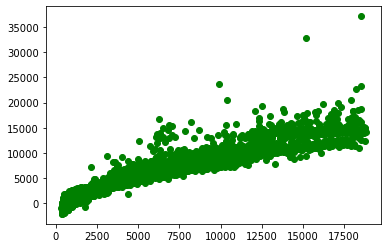

In [57]:
y_pred = lm1.predict(data_test)
plt.scatter(y_test['price'], y_pred,color='green')
plt.show()

In [58]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(4276.21) * Intercept + (11021.58) * carat + (108.11) * cut + (333.87) * color + (505.36) * clarity + (-79.53) * depth + (-30.36) * table + (-939.49) * x + (10.63) * y + (-41.27) * z + 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [61]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"=",  vif[i])
        i = i+1

carat = 78.51806916450715
cut = 8.889026219812818
color = 5.541678486356636
clarity = 5.322575086271028
depth = 546.2885232265849
table = 540.0403059867093
x = 1086.0605003150597
y = 347.5131689313624
z = 338.72765260677505


In [62]:
from scipy.stats import zscore
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [63]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [64]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.305146049151293
The coefficient for cut is 0.02983104802605988
The coefficient for color is 0.1418685525270648
The coefficient for clarity is 0.20775059249012753
The coefficient for depth is -0.02741636541248186
The coefficient for table is -0.016898973043806706
The coefficient for x is -0.2631486297617028
The coefficient for y is 0.0031297276913459736
The coefficient for z is -0.007476104677658047


In [65]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is [-1.39222413e-16]


In [66]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9077569135705156

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

### 2.1: Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [68]:
df=pd.read_csv('Holiday_Package.csv')

In [69]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [70]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [73]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [74]:
dups=df.duplicated()
print('Number of duplicate rows = %d'% (dups.sum()))

Number of duplicate rows = 0


In [75]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




In [76]:
from warnings import filterwarnings
filterwarnings('ignore')

In [77]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [78]:
df_new=df.drop(df.columns[[0,6]],axis=1)
df_new

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2
...,...,...,...,...,...
867,40030,24,4,2,1
868,32137,48,8,0,0
869,25178,24,6,2,0
870,55958,41,10,0,1


In [79]:
len(df.columns)

7

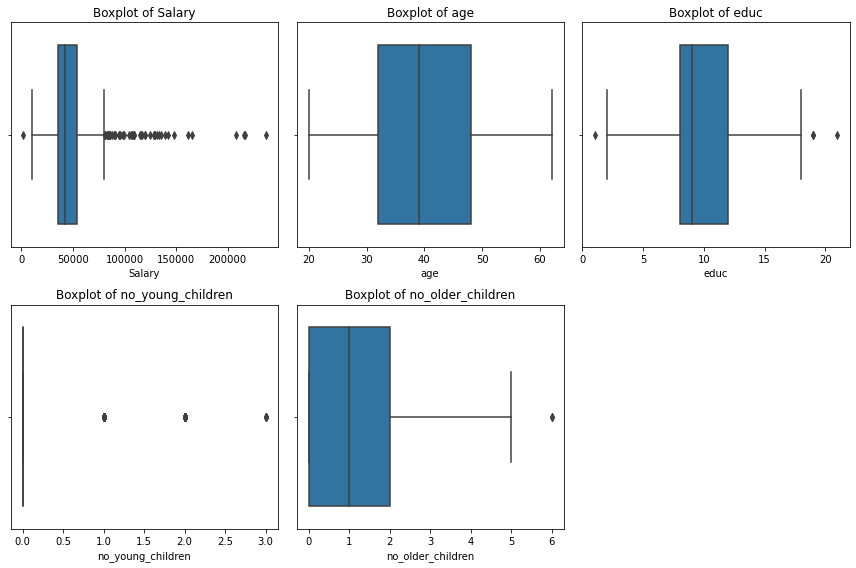

In [80]:
plt.figure(figsize = (12,8))
New_list = df_new.columns
for i in range(len(New_list)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x = df_new[New_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(New_list[i]))
    plt.tight_layout()

In [81]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [82]:
lr,ur=remove_outlier(df['Salary'])
print('Lower Range of Salary :',lr,'\nUpper Range of Salary :',ur)
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])

Lower Range of Salary : 8105.75 
Upper Range of Salary : 80687.75


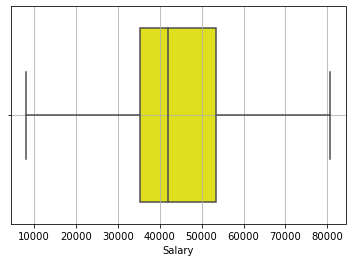

In [83]:
sns.boxplot(df['Salary'],whis=2.5,color='yellow')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

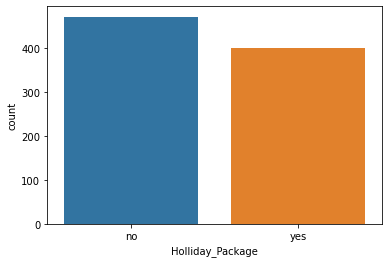

In [84]:
sns.countplot(x='Holliday_Package',data=df)

<AxesSubplot:xlabel='educ', ylabel='count'>

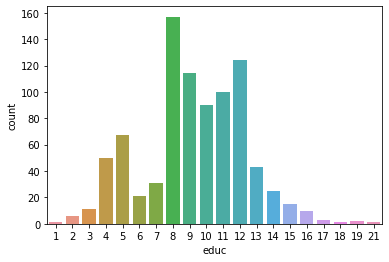

In [85]:
sns.countplot(x='educ',data=df)

<AxesSubplot:xlabel='foreign', ylabel='count'>

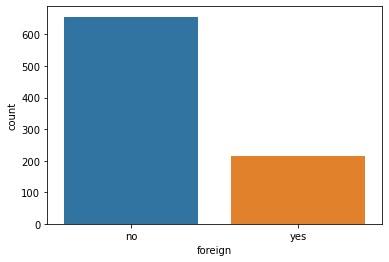

In [86]:
sns.countplot(x='foreign',data=df)

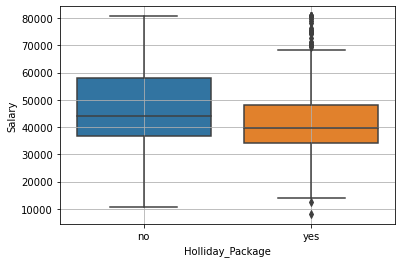

In [87]:
sns.boxplot(df['Holliday_Package'],df['Salary'])
plt.grid()
plt.show()

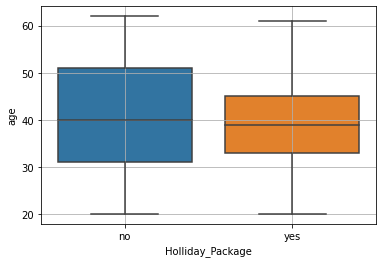

In [88]:
sns.boxplot(df['Holliday_Package'],df['age'])
plt.grid()
plt.show()

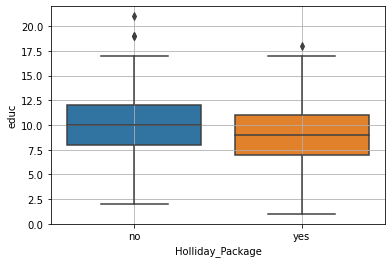

In [89]:
sns.boxplot(df['Holliday_Package'],df['educ'])
plt.grid()
plt.show()

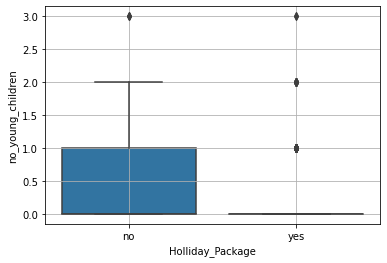

In [90]:
sns.boxplot(df['Holliday_Package'],df['no_young_children'])
plt.grid()
plt.show()

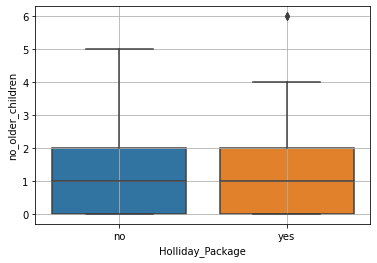

In [91]:
sns.boxplot(df['Holliday_Package'],df['no_older_children'])
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

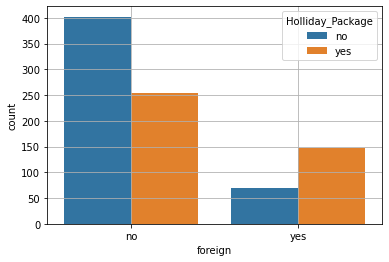

In [92]:
sns.countplot(df['foreign'],hue=df['Holliday_Package'])
plt.grid()
plt.show

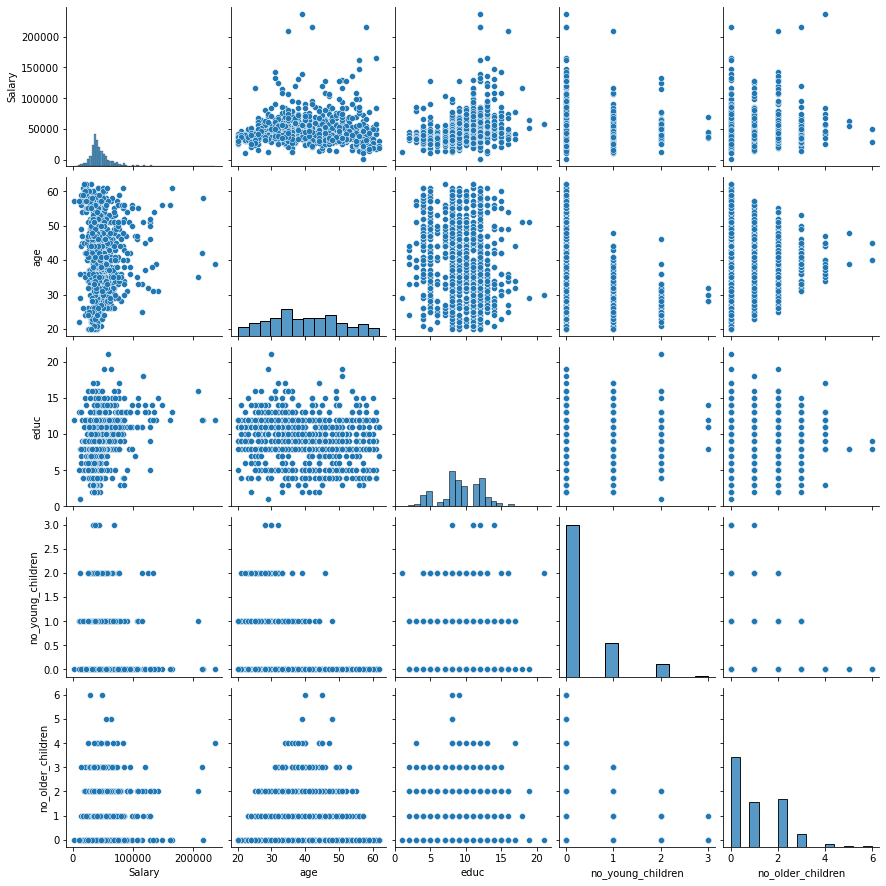

In [93]:
sns.pairplot(df_new)
plt.show()

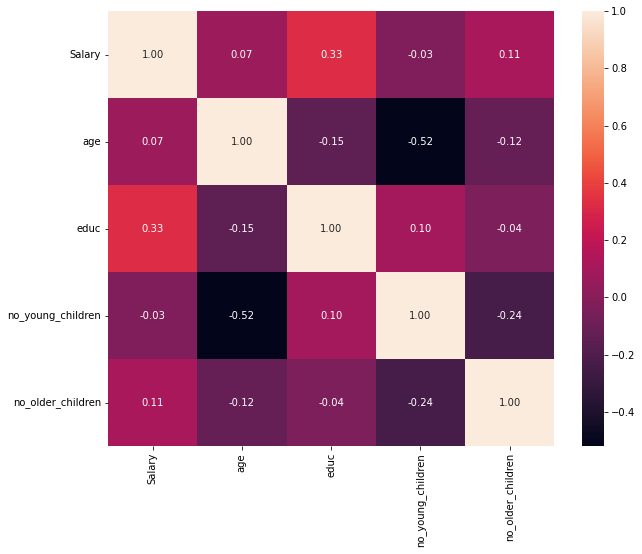

In [94]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True,fmt=".2f")
plt.show()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [95]:
df['Holliday_Package'] = pd.Categorical(df['Holliday_Package']).codes

In [96]:
df['Holliday_Package'].value_counts()

0    471
1    401
Name: Holliday_Package, dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    object 
dtypes: float64(1), int64(4), int8(1), object(1)
memory usage: 41.9+ KB


In [98]:
df1 = pd.get_dummies(df, columns=['foreign'],drop_first=True)

In [99]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [100]:
df1.corr()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
Holliday_Package,1.000000,-0.180214,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.180214,1.000000,0.047029,0.352726,-0.034360,0.121993,-0.239387
age,-0.092311,0.047029,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.352726,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.034360,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.121993,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign_yes,0.254096,-0.239387,-0.107148,-0.419678,0.085111,0.021317,1.000000


In [102]:
X= df1.drop('Holliday_Package',axis=1)
Y=df1['Holliday_Package']

In [103]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


In [104]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package, dtype: int8

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1,stratify=df1['Holliday_Package'])

In [107]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [109]:
Y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [111]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   27.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [112]:
Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

In [113]:
X_train

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1
...,...,...,...,...,...,...
594,42369.0,47,9,0,1,0
297,44207.0,45,12,0,2,0
76,50291.0,34,10,0,2,0
831,33434.0,44,7,0,1,1


In [114]:
X_test

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
264,25118.0,58,8,0,0,0
189,40913.0,20,9,1,0,0
643,28446.0,58,8,0,0,0
65,36072.0,35,4,0,2,0
241,52736.0,40,10,0,3,0
...,...,...,...,...,...,...
165,34878.0,29,14,1,1,0
100,61159.0,38,10,0,3,0
503,41167.0,44,9,0,2,0
431,41769.0,43,9,0,0,0


In [115]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.677845,0.322155
1,0.534493,0.465507
2,0.691845,0.308155
3,0.487745,0.512255
4,0.571939,0.428061


In [116]:
print('No. of rows and columns of the training set for the independent variables:',X_train.shape)
print('No. of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('No. of rows and columns of the test set for the independent variables:',X_test.shape)
print('No. of rows and columns of the test set for the dependent variable:',Y_test.shape)

No. of rows and columns of the training set for the independent variables: (610, 6)
No. of rows and columns of the training set for the dependent variable: (610,)
No. of rows and columns of the test set for the independent variables: (262, 6)
No. of rows and columns of the test set for the dependent variable: (262,)


In [117]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [118]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

In [123]:
X_train.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1


In [122]:
X_test.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
264,25118.0,58,8,0,0,0
189,40913.0,20,9,1,0,0
643,28446.0,58,8,0,0,0
65,36072.0,35,4,0,2,0
241,52736.0,40,10,0,3,0


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [124]:
model.score(X_train,Y_train)

0.6622950819672131

AUC: 0.731


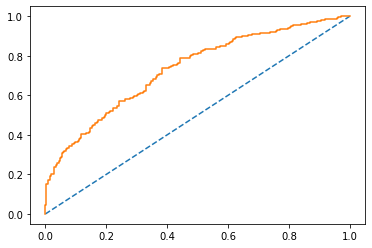

In [125]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [127]:
model.score(X_test,Y_test)

0.648854961832061

AUC: 0.731


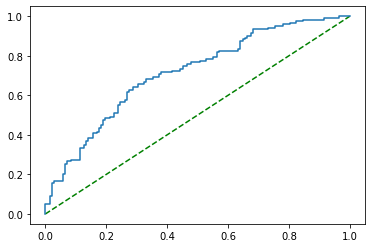

In [128]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='green')
plt.plot(test_fpr, test_tpr);

In [129]:
confusion_matrix(Y_train,Ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

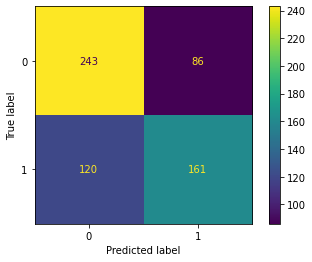

In [133]:
plot_confusion_matrix(model,X_train,Y_train);

In [134]:
print(classification_report(Y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [136]:
confusion_matrix(Y_test,Ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

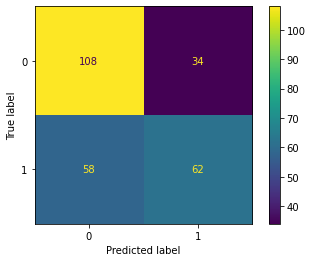

In [137]:
plot_confusion_matrix(model,X_test,Y_test);

In [139]:
print(classification_report(Y_test, Ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [140]:
grid={'penalty':['7','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [141]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [142]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [144]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['7', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [145]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [146]:
best_model = grid_search.best_estimator_

In [147]:
Ytrain_predict = best_model.predict(X_train)
Ytest_predict = best_model.predict(X_test)

In [148]:
Ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.525616,0.474384
1,0.555497,0.444503
2,0.530489,0.469511
3,0.546021,0.453979
4,0.568725,0.431275


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



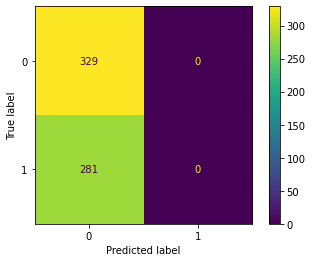

In [149]:
plot_confusion_matrix(best_model,X_train,Y_train)
print(classification_report(Y_train, Ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



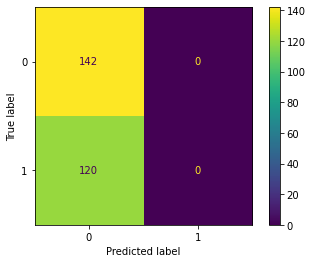

In [150]:
plot_confusion_matrix(best_model,X_test,Y_test)
print(classification_report(Y_test, Ytest_predict),'\n');

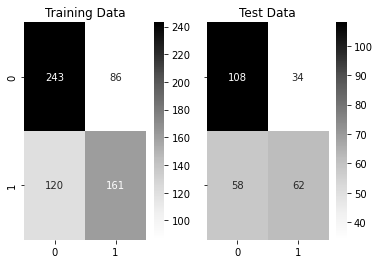

In [151]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [152]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



In [157]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [158]:
pred_prob_train[:,1]

array([0.73381047, 0.28335139, 0.39602227, 0.75811139, 0.47077503,
       0.40288832, 0.36938597, 0.30429271, 0.60511549, 0.64331779,
       0.23236876, 0.25905352, 0.35870658, 0.04481746, 0.28052157,
       0.36436459, 0.54805152, 0.30607846, 0.58596151, 0.66087477,
       0.62864901, 0.26524013, 0.88183311, 0.3339946 , 0.08650304,
       0.82610447, 0.19401889, 0.75721542, 0.53138081, 0.1884556 ,
       0.29545808, 0.33809258, 0.3786442 , 0.3805076 , 0.31248766,
       0.29335095, 0.10970912, 0.56057784, 0.48145587, 0.19510252,
       0.22664102, 0.79936112, 0.5017598 , 0.73936151, 0.7906696 ,
       0.36957611, 0.30401273, 0.93317999, 0.43207603, 0.72243241,
       0.71571829, 0.45361505, 0.78697249, 0.3732299 , 0.19256563,
       0.74061067, 0.25056989, 0.51469343, 0.67344556, 0.35368416,
       0.61007438, 0.52767641, 0.52194835, 0.41031873, 0.56904209,
       0.61659997, 0.1237378 , 0.56414678, 0.40272604, 0.27648254,
       0.33165029, 0.74716143, 0.77838017, 0.21902504, 0.44569

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


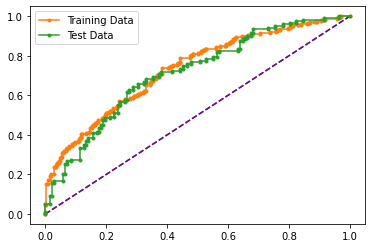

In [160]:
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--',color='purple')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()